In [1]:
import os
import numpy as np
import pandas as pd
from numpy.random import RandomState

### Merge target and variables dataset for future observation. 

In [4]:
#from numpy.random import RandomState

df = pd.read_csv('train_2016.csv')
df_pro = pd.read_csv('properties_2016.csv')
rng = RandomState()

data_2016 = pd.merge(df, df_pro, how = 'left', on = 'parcelid')

In [5]:
data_2016.shape

(90275, 60)

# Data Examination and Analysis

### For this task, I'm doing a general data examination about the proerpties 2016 dataset. The main purpose of this task is to observe how's the data distributed, the correlation between the variables, and how to pick up the relavant variables for the log error predictions.

In [6]:
data_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      90275 non-null  int64  
 1   logerror                      90275 non-null  float64
 2   transactiondate               90275 non-null  object 
 3   airconditioningtypeid         28781 non-null  float64
 4   architecturalstyletypeid      261 non-null    float64
 5   basementsqft                  43 non-null     float64
 6   bathroomcnt                   90275 non-null  float64
 7   bedroomcnt                    90275 non-null  float64
 8   buildingclasstypeid           16 non-null     float64
 9   buildingqualitytypeid         57364 non-null  float64
 10  calculatedbathnbr             89093 non-null  float64
 11  decktypeid                    658 non-null    float64
 12  finishedfloor1squarefeet      6856 non-null   float64
 13  c

By observing the info. We can see that most of the data is float type (numerical), a few of the data is categorical

##### We can see the 2016 datasets has 2985217 entries and 58 variables. There are lots of 'NaN' data from the sample output. We want to see each how many data are missing for each variables.

There are 29 columns with more than 50% of missing data


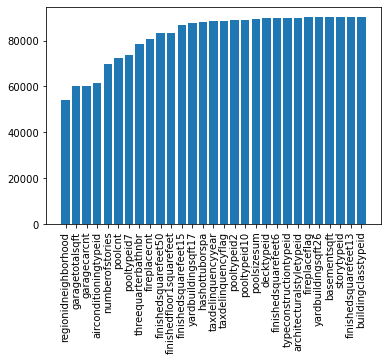

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import warnings
import plotly.express as px

#Print out the coluns missing half of the data (half data is none)
missing_df = data_2016.isnull().sum()
more_than_50 = missing_df[missing_df.values>(0.5*len(data_2016))].sort_values().reset_index()
print('There are {} columns with more than 50% of missing data'.format(len(more_than_50)))

var = [i for i in more_than_50['index']]
val = [i for i in more_than_50[0]]
#plt.xticks(rotation = 45)
plt.bar(var, val)
plt.xticks(rotation = 90)
plt.show()

We can see that there are some varaible missing more than 4000 data. Sparse variable might not be too valuable for the prediction. So that we can remove the column with more than 70% missing data. For the result of the variable, we can remove all the missiong value. After than, we can see decide how categorical and numerical variable can be used for prediction. 

In [8]:
missing_df = data_2016.isnull().sum()
more_than_50 = missing_df[missing_df.values>(0.5*len(data_2016))].sort_values().reset_index()
print('There are {} columns with more than 50% of missing data'.format(len(more_than_50)))

There are 29 columns with more than 50% of missing data


In [10]:
col_name = [i for i in more_than_50['index']]

for i in col_name: 
    data_2016.drop(i, axis=1, inplace=True)

Let's observe numerical feature first. From the dataset info, we can see most the numerical feature are float64 instead of parcelid.

#### Further observation the distribution of the data. 

In [11]:
data_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      90275 non-null  int64  
 1   logerror                      90275 non-null  float64
 2   transactiondate               90275 non-null  object 
 3   bathroomcnt                   90275 non-null  float64
 4   bedroomcnt                    90275 non-null  float64
 5   buildingqualitytypeid         57364 non-null  float64
 6   calculatedbathnbr             89093 non-null  float64
 7   calculatedfinishedsquarefeet  89614 non-null  float64
 8   finishedsquarefeet12          85596 non-null  float64
 9   fips                          90275 non-null  float64
 10  fullbathcnt                   89093 non-null  float64
 11  heatingorsystemtypeid         56080 non-null  float64
 12  latitude                      90275 non-null  float64
 13  l

#### From above information and intuition of the factor which can influence the house price, we can pick taxvaluedollarcnt, yearbuilt  ,taxamount to explore the importance and distirbution.  

(array([   64.,   757.,  3036.,  4696.,  8393., 19334., 15943., 17507.,
        11370.,  8419.]),
 array([1885., 1898., 1911., 1924., 1937., 1950., 1963., 1976., 1989.,
        2002., 2015.]),
 <BarContainer object of 10 artists>)

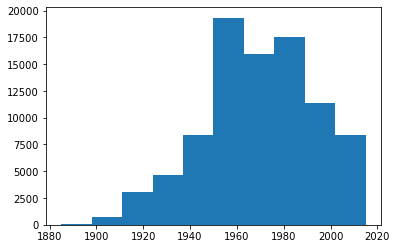

In [12]:
year_built = data_2016['yearbuilt'].dropna()
year_built = [i for i in year_built]
plt.hist(year_built)

(array([5.3180e+03, 5.7804e+04, 2.0279e+04, 6.1970e+03, 2.3400e+02,
        3.6500e+02, 4.7000e+01, 2.2000e+01, 4.0000e+00, 5.0000e+00]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <BarContainer object of 10 artists>)

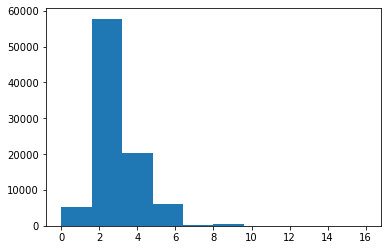

In [13]:
tax = data_2016['bedroomcnt'].dropna()
tax = [i for i in tax]
plt.hist(tax)

(array([7.0000e+00, 3.2000e+01, 7.2000e+02, 8.5300e+03, 2.8253e+04,
        4.1179e+04, 9.7640e+03, 1.5660e+03, 1.9500e+02, 2.3000e+01]),
 array([ 3.89345162,  4.77231729,  5.65118296,  6.53004863,  7.4089143 ,
         8.28777997,  9.16664564, 10.04551131, 10.92437699, 11.80324266,
        12.68210833]),
 <BarContainer object of 10 artists>)

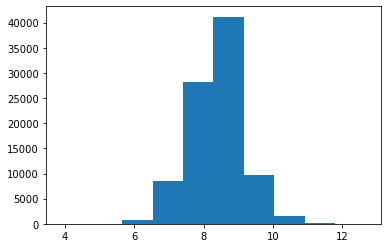

In [14]:
tax = data_2016['taxamount'].dropna()
tax = [np.log(i) for i in tax]
plt.hist(tax)

### Final selection of variables

In [16]:
df = data_2016.copy()

cat_cols = ["transactiondate", "propertycountylandusecode", 'propertyzoningdesc']
train_df = df.drop(cat_cols, axis=1)

train_df = train_df.dropna()






In [17]:
train_df 

,parcelid,logerror,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
0,11016594,0.0276,2.0,3.0,4.0,2.0,1684.0,1684.0,6037.0,2.0,...,96370.0,0.0,1.0,1959.0,122754.0,360170.0,2015.0,237416.0,6735.88,6.037107e+13
2,12098116,-0.0040,3.0,2.0,4.0,3.0,2217.0,2217.0,6037.0,3.0,...,96293.0,0.0,1.0,1940.0,61994.0,119906.0,2015.0,57912.0,11484.48,6.037464e+13
3,12643413,0.0218,2.0,2.0,4.0,2.0,839.0,839.0,6037.0,2.0,...,96222.0,0.0,1.0,1987.0,171518.0,244880.0,2015.0,73362.0,3048.74,6.037296e+13
5,11509835,-0.2705,4.0,4.0,1.0,4.0,3067.0,3067.0,6037.0,4.0,...,96109.0,0.0,1.0,1982.0,880650.0,2447951.0,2015.0,1567301.0,27126.57,6.037621e+13
6,12286022,0.0440,1.0,2.0,7.0,1.0,1297.0,1297.0,6037.0,1.0,...,96091.0,0.0,1.0,1939.0,64549.0,111521.0,2015.0,46972.0,2304.97,6.037542e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90268,12268527,-0.0151,3.0,3.0,4.0,3.0,2438.0,2438.0,6037.0,3.0,...,96092.0,0.0,1.0,1943.0,192373.0,315288.0,2015.0,122915.0,5853.81,6.037541e+13
90269,12920746,0.0344,2.0,3.0,4.0,2.0,1448.0,1448.0,6037.0,2.0,...,96473.0,0.0,1.0,1959.0,141700.0,405000.0,2015.0,263300.0,5311.03,6.037404e+13
90270,10774160,-0.0356,1.0,1.0,4.0,1.0,653.0,653.0,6037.0,1.0,...,96364.0,0.0,1.0,1979.0,43800.0,191000.0,2015.0,147200.0,2495.24,6.037132e+13
90271,12046695,0.0070,3.0,3.0,4.0,3.0,2856.0,2856.0,6037.0,3.0,...,96327.0,0.0,1.0,1965.0,117893.0,161111.0,2015.0,43218.0,1886.54,6.037301e+13


In [18]:
train_y = train_df['logerror']

In [19]:
train_df.columns

Index(['parcelid', 'logerror', 'bathroomcnt', 'bedroomcnt',
       'buildingqualitytypeid', 'calculatedbathnbr',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fips',
       'fullbathcnt', 'heatingorsystemtypeid', 'latitude', 'longitude',
       'lotsizesquarefeet', 'propertylandusetypeid', 'rawcensustractandblock',
       'regionidcity', 'regionidcounty', 'regionidzip', 'roomcnt', 'unitcnt',
       'yearbuilt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
       'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount',
       'censustractandblock'],
      dtype='object')

In [20]:
train_x = train_df[['bathroomcnt', 'bedroomcnt',
       'buildingqualitytypeid', 'calculatedbathnbr',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fips',
       'fullbathcnt', 'heatingorsystemtypeid', 'latitude', 'longitude',
       'lotsizesquarefeet', 'propertylandusetypeid', 'rawcensustractandblock',
       'regionidcity', 'regionidcounty', 'regionidzip', 'roomcnt', 'unitcnt',
       'yearbuilt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
       'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount',
       'censustractandblock']]
#train_x

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,...,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
0,2.0,3.0,4.0,2.0,1684.0,1684.0,6037.0,2.0,2.0,34280990.0,...,96370.0,0.0,1.0,1959.0,122754.0,360170.0,2015.0,237416.0,6735.88,6.037107e+13
2,3.0,2.0,4.0,3.0,2217.0,2217.0,6037.0,3.0,2.0,34136312.0,...,96293.0,0.0,1.0,1940.0,61994.0,119906.0,2015.0,57912.0,11484.48,6.037464e+13
3,2.0,2.0,4.0,2.0,839.0,839.0,6037.0,2.0,2.0,33755800.0,...,96222.0,0.0,1.0,1987.0,171518.0,244880.0,2015.0,73362.0,3048.74,6.037296e+13
5,4.0,4.0,1.0,4.0,3067.0,3067.0,6037.0,4.0,2.0,33870089.0,...,96109.0,0.0,1.0,1982.0,880650.0,2447951.0,2015.0,1567301.0,27126.57,6.037621e+13
6,1.0,2.0,7.0,1.0,1297.0,1297.0,6037.0,1.0,7.0,33899475.0,...,96091.0,0.0,1.0,1939.0,64549.0,111521.0,2015.0,46972.0,2304.97,6.037542e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90268,3.0,3.0,4.0,3.0,2438.0,2438.0,6037.0,3.0,2.0,33916972.0,...,96092.0,0.0,1.0,1943.0,192373.0,315288.0,2015.0,122915.0,5853.81,6.037541e+13
90269,2.0,3.0,4.0,2.0,1448.0,1448.0,6037.0,2.0,2.0,34098870.0,...,96473.0,0.0,1.0,1959.0,141700.0,405000.0,2015.0,263300.0,5311.03,6.037404e+13
90270,1.0,1.0,4.0,1.0,653.0,653.0,6037.0,1.0,2.0,34203000.0,...,96364.0,0.0,1.0,1979.0,43800.0,191000.0,2015.0,147200.0,2495.24,6.037132e+13
90271,3.0,3.0,4.0,3.0,2856.0,2856.0,6037.0,3.0,2.0,34198744.0,...,96327.0,0.0,1.0,1965.0,117893.0,161111.0,2015.0,43218.0,1886.54,6.037301e+13


### Now we fit are first model, and use the feature_imporances to observe the importances of selected models. We pick the importances above 0.4 as our final feature selection. 

In [67]:
from sklearn import ensemble
baseline_model = ensemble.ExtraTreesRegressor(n_estimators=25, max_depth=30, max_features=0.3, n_jobs=-1, random_state=0)
baseline_model.fit(train_x, train_y)

ExtraTreesRegressor(max_depth=30, max_features=0.3, n_estimators=25, n_jobs=-1,
                    random_state=0)

In [68]:
feat_names = train_x.columns

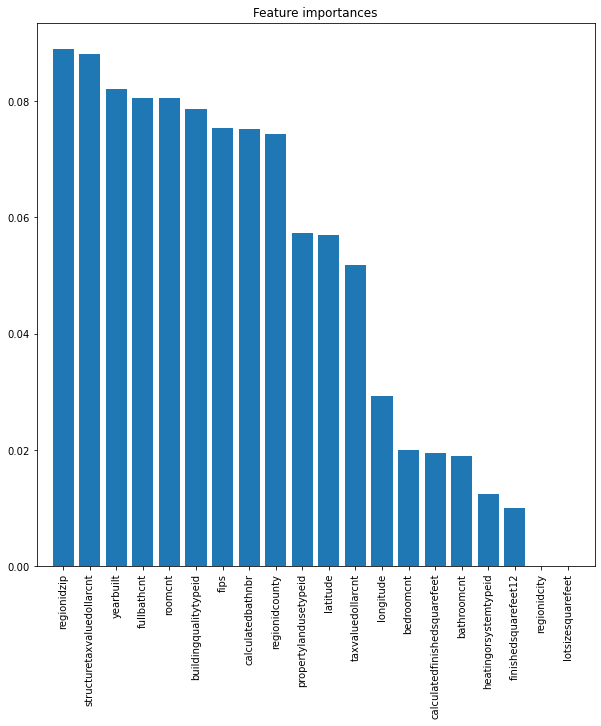

In [69]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(10,10))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

#### We pick feature importance above 0.04 only

In [29]:
final_x = data_2016[['logerror',
       'buildingqualitytypeid', 'calculatedbathnbr',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
       'fullbathcnt', 'heatingorsystemtypeid', 'longitude',
       'lotsizesquarefeet', 'propertylandusetypeid', 'rawcensustractandblock',
       'regionidcity', 'regionidcounty', 'regionidzip', 'roomcnt', 'unitcnt',
       'yearbuilt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
       'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount',
       'censustractandblock']].dropna()

In [30]:
final_train_x = final_x[['buildingqualitytypeid', 'calculatedbathnbr',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
       'fullbathcnt', 'heatingorsystemtypeid', 'longitude',
       'lotsizesquarefeet', 'propertylandusetypeid', 'rawcensustractandblock',
       'regionidcity', 'regionidcounty', 'regionidzip', 'roomcnt', 'unitcnt',
       'yearbuilt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
       'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount',
       'censustractandblock']]

In [31]:
final_train_y = final_x['logerror']

In [32]:
train_data = final_x.sample(frac=0.49, random_state=rng)
test_data = final_x.loc[~final_x.index.isin(train_data.index)]

In [33]:
test_data

,logerror,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,heatingorsystemtypeid,longitude,lotsizesquarefeet,propertylandusetypeid,...,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
0,0.0276,4.0,2.0,1684.0,1684.0,2.0,2.0,-118488536.0,7528.0,261.0,...,96370.0,0.0,1.0,1959.0,122754.0,360170.0,2015.0,237416.0,6735.88,6.037107e+13
2,-0.0040,4.0,3.0,2217.0,2217.0,3.0,2.0,-118175032.0,11423.0,261.0,...,96293.0,0.0,1.0,1940.0,61994.0,119906.0,2015.0,57912.0,11484.48,6.037464e+13
3,0.0218,4.0,2.0,839.0,839.0,2.0,2.0,-118309000.0,70859.0,266.0,...,96222.0,0.0,1.0,1987.0,171518.0,244880.0,2015.0,73362.0,3048.74,6.037296e+13
5,-0.2705,1.0,4.0,3067.0,3067.0,4.0,2.0,-118402768.0,2708.0,261.0,...,96109.0,0.0,1.0,1982.0,880650.0,2447951.0,2015.0,1567301.0,27126.57,6.037621e+13
17,-0.0419,7.0,1.0,597.0,597.0,1.0,2.0,-118123000.0,147471.0,266.0,...,96238.0,0.0,1.0,1970.0,56233.0,70316.0,2015.0,14083.0,913.17,6.037575e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90262,-0.2231,7.0,2.0,1456.0,1456.0,2.0,2.0,-118455969.0,7311.0,261.0,...,96368.0,0.0,1.0,1966.0,140984.0,297456.0,2015.0,156472.0,3738.38,6.037107e+13
90264,0.0478,10.0,3.0,2712.0,2712.0,3.0,2.0,-118695925.0,156910.0,266.0,...,96116.0,0.0,1.0,2004.0,532796.0,1331992.0,2015.0,799196.0,18297.87,6.037801e+13
90269,0.0344,4.0,2.0,1448.0,1448.0,2.0,2.0,-117875148.0,7594.0,261.0,...,96473.0,0.0,1.0,1959.0,141700.0,405000.0,2015.0,263300.0,5311.03,6.037404e+13
90271,0.0070,4.0,3.0,2856.0,2856.0,3.0,2.0,-118224849.0,9343.0,261.0,...,96327.0,0.0,1.0,1965.0,117893.0,161111.0,2015.0,43218.0,1886.54,6.037301e+13


In [34]:
final_train_x = train_data[['buildingqualitytypeid', 'calculatedbathnbr',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
       'fullbathcnt', 'heatingorsystemtypeid', 'longitude',
       'lotsizesquarefeet', 'propertylandusetypeid', 'rawcensustractandblock',
       'regionidcity', 'regionidcounty', 'regionidzip', 'roomcnt', 'unitcnt',
       'yearbuilt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
       'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount',
       'censustractandblock']]

In [35]:
final_train_y = train_data['logerror']

Model1: Linear Regression

In [70]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [71]:
lr.fit(final_train_x,final_train_y)

LinearRegression()

Model2: Random Forest 

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [264]:
rf =  RandomForestRegressor(max_depth=5)

In [265]:
rf.fit(final_train_x,final_train_y)

RandomForestRegressor(max_depth=5)

Model3: Extra Tree Regressor

In [266]:
model = ensemble.ExtraTreesRegressor(n_estimators=23, max_depth=5, max_features=0.2)
model.fit(final_train_x, final_train_y)

ExtraTreesRegressor(max_depth=5, max_features=0.2, n_estimators=23)

Model 4: Decision Tree Regressor

In [267]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

In [268]:
dt.fit(final_train_x,final_train_y)

DecisionTreeRegressor()

## Make prediction.

In [269]:
test_x = test_data[['buildingqualitytypeid', 'calculatedbathnbr',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
       'fullbathcnt', 'heatingorsystemtypeid', 'longitude',
       'lotsizesquarefeet', 'propertylandusetypeid', 'rawcensustractandblock',
       'regionidcity', 'regionidcounty', 'regionidzip', 'roomcnt', 'unitcnt',
       'yearbuilt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
       'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount',
       'censustractandblock']]

In [270]:
test_y = test_data['logerror']

In [271]:
predictions = lr.predict(test_x)

In [272]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y, predictions)

0.07175025757124547

In [273]:
predictions_2 = rf.predict(test_x)

In [274]:
mean_absolute_error(test_y, predictions_2)

0.07195792700807827

In [275]:
predictions_3 = model.predict(test_x)

In [276]:
mean_absolute_error(test_y, predictions_3)

0.07167073463226066

In [277]:
predictions_4 = dt.predict(test_x)

In [278]:
mean_absolute_error(test_y, predictions_4)

0.11434878794919456

### Save the Best model with lowest MAE

In [279]:
import pickle
 
#Write to local 
with open('best.model', 'wb') as files:
    pickle.dump(model, files)